In [1]:
import pandas as pd
import numpy as np
import plotly
plotly.tools.set_credentials_file(username='sherry9788', api_key='Cw40WD6lRwalI8wtPd72')
import plotly.plotly as py
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
df.shape

(16719, 16)

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


## Variables

In [5]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [6]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [7]:
df2 = df.copy().dropna()
df2.shape
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
Name               6825 non-null object
Platform           6825 non-null object
Year_of_Release    6825 non-null float64
Genre              6825 non-null object
Publisher          6825 non-null object
NA_Sales           6825 non-null float64
EU_Sales           6825 non-null float64
JP_Sales           6825 non-null float64
Other_Sales        6825 non-null float64
Global_Sales       6825 non-null float64
Critic_Score       6825 non-null float64
Critic_Count       6825 non-null float64
User_Score         6825 non-null object
User_Count         6825 non-null float64
Developer          6825 non-null object
Rating             6825 non-null object
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


In [8]:
df2.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000
mean,2007.436777,0.394484,0.236089,0.064158,0.082677,0.777590,70.272088,28.931136,174.722344
std,4.211248,0.967385,0.687330,0.287570,0.269871,1.963443,13.868572,19.224165,587.428538
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,11.000000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,0.290000,72.000000,25.000000,27.000000
75%,2011.000000,0.390000,0.210000,0.010000,0.070000,0.750000,80.000000,39.000000,89.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,10665.000000


## Name

In [9]:
df.Name.nunique()

11562

Not every one is unique, check to see what the duplicates look like

In [10]:
df[df.Name==df[df.Name.duplicated()].Name.values[0]]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,97.0,50.0,8.2,3994.0,Rockstar North,M
23,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27,97.0,58.0,8.1,3711.0,Rockstar North,M
42,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.96,6.31,0.38,1.97,12.61,97.0,66.0,8.3,2899.0,Rockstar North,M
165,Grand Theft Auto V,XOne,2014.0,Action,Take-Two Interactive,2.81,2.19,0.00,0.47,5.48,97.0,14.0,7.9,764.0,Rockstar North,M
1730,Grand Theft Auto V,PC,2015.0,Action,Take-Two Interactive,0.39,0.69,0.00,0.09,1.17,96.0,57.0,7.9,3756.0,Rockstar North,M


In [11]:
df2.Platform.unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', '3DS', 'PS4', 'PS', 'XB', 'PC',
       'PSP', 'WiiU', 'GC', 'GBA', 'XOne', 'PSV', 'DC'], dtype=object)

These are the games that have versions across multiple platforms.

## Platform

In [12]:
data = [go.Histogram(x=df2.Platform)]
py.iplot(data, filename='Platform Frequency')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~sherry9788/0 or inside your plot.ly account where it is named 'Platform Frequency'


In [13]:
platform = df2.Platform.value_counts()
print(platform)

PS2     1140
X360     858
PS3      769
PC       651
XB       565
Wii      479
DS       464
PSP      390
GC       348
PS4      239
GBA      237
XOne     159
3DS      155
PS       150
PSV      118
WiiU      89
DC        14
Name: Platform, dtype: int64


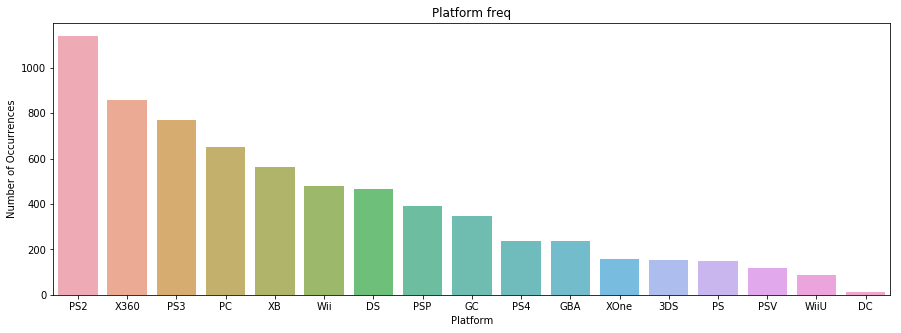

In [14]:
plt.figure(figsize=(15,5))
sns.barplot(platform.index, platform.values, alpha=0.8)
plt.title('Platform freq')
plt.ylabel('Number of Occurrences')
plt.xlabel('Platform')
plt.show()

## Genre

In [15]:
df2.Genre.unique()

array(['Sports', 'Racing', 'Platform', 'Misc', 'Action', 'Puzzle',
       'Shooter', 'Fighting', 'Simulation', 'Role-Playing', 'Adventure',
       'Strategy'], dtype=object)

In [16]:
genre = df2.Genre.value_counts()
print(genre)

Action          1630
Sports           943
Shooter          864
Role-Playing     712
Racing           581
Platform         403
Misc             384
Fighting         378
Simulation       297
Strategy         267
Adventure        248
Puzzle           118
Name: Genre, dtype: int64


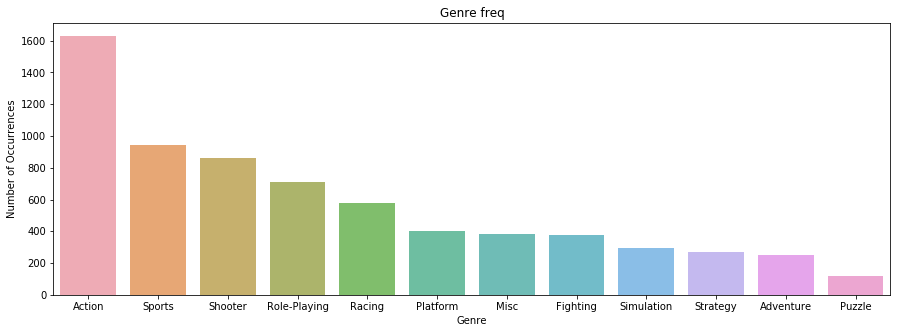

In [17]:
plt.figure(figsize=(15,5))
sns.barplot(genre.index, genre.values, alpha=0.8)
plt.title('Genre freq')
plt.ylabel('Number of Occurrences')
plt.xlabel('Genre')
plt.show()

## Publisher

In [18]:
df2.Publisher.unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'SquareSoft',
       'GT Interactive', 'Konami Digital Entertainment', 'Square Enix',
       'Sony Computer Entertainment Europe', 'Virgin Interactive',
       'LucasArts', '505 Games', 'Capcom',
       'Warner Bros. Interactive Entertainment', 'Universal Interactive',
       'RedOctane', 'Atari', 'Eidos Interactive', 'Namco Bandai Games',
       'Vivendi Games', 'MTV Games', 'Sega', 'THQ',
       'Disney Interactive Studios', 'Acclaim Entertainment',
       'Midway Games', 'Deep Silver', 'NCSoft', 'Tecmo Koei',
       'Valve Software', 'Infogrames', 'Mindscape', 'Valve',
       'Hello Games', 'Global Star', 'Gotham Games',
       'Crave Entertainment', 'Hasbro Interactive', 'Codemasters',
       'TDK Mediactive', 'Zoo Games', 'Sony Online Entertainment', 'RTL',
       'D3Publisher', 'Black Label Games', 'Sou

In [19]:
len(df2.Publisher.unique())

262

In [20]:
df2.Publisher.value_counts().iloc[:40]

Electronic Arts                           944
Ubisoft                                   496
Activision                                492
Sony Computer Entertainment               316
THQ                                       307
Nintendo                                  291
Sega                                      284
Take-Two Interactive                      273
Konami Digital Entertainment              244
Namco Bandai Games                        239
Capcom                                    197
Atari                                     176
Microsoft Game Studios                    141
Tecmo Koei                                137
Square Enix                               134
Warner Bros. Interactive Entertainment    130
Eidos Interactive                         123
Vivendi Games                             113
Codemasters                               111
Midway Games                              103
505 Games                                  80
Deep Silver                       

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

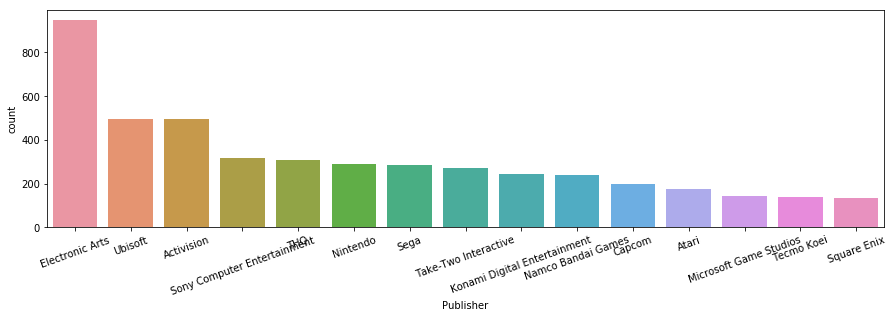

In [21]:
plt.figure(figsize=(15, 4))
sns.countplot(df2.Publisher, order=df2.Publisher.value_counts().iloc[:15].index)
plt.xticks(rotation=20)

## Year of Release

In [22]:
np.sort(df2.Year_of_Release.unique())

array([1985., 1988., 1992., 1994., 1996., 1997., 1998., 1999., 2000.,
       2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008., 2009.,
       2010., 2011., 2012., 2013., 2014., 2015., 2016.])

In [23]:
df2.Year_of_Release = df2.Year_of_Release.astype(int)

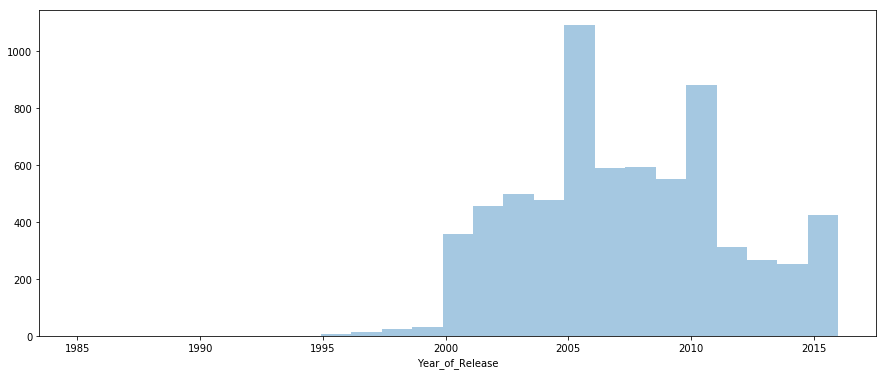

In [24]:
plt.figure(figsize=(15, 6))
sns.distplot(df2.Year_of_Release, kde = False, bins=df2.Year_of_Release.nunique())

## Critic_Score, Critic_Count, User_Score, User_Count

In [25]:
df2.User_Score.unique()

array(['8', '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4', '8.2',
       '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2', '8.9',
       '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3', '7.6',
       '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1', '6.7',
       '5.4', '4', '9.3', '6.2', '4.2', '6', '4.9', '3.7', '4.1', '5.8',
       '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1', '2.9', '5.2',
       '3.3', '4.5', '5.1', '3.5', '2.5', '1.9', '2.2', '2', '9.5', '4.7',
       '2.1', '3.6', '1.8', '3.8', '3', '9.6', '2.8', '1.7', '2.7', '2.4',
       '1.5', '1.2', '2.3', '0.5', '0.6', '0.9', '1', '1.4', '1.3', '0.7'],
      dtype=object)

In [26]:
df2.User_Score = df2.User_Score.astype(float)
print(df2.User_Score.max())
print(df2.User_Score.min())

9.6
0.5


In [27]:
df2.User_Count = df2.User_Count.astype(int)
print(df2.User_Count.max())
print(df2.User_Count.min())

10665
4


In [28]:
df2.Critic_Score = df2.Critic_Score.astype(float)
print(df2.Critic_Score.max())
print(df2.Critic_Score.min())

98.0
13.0


In [29]:
df2.Critic_Count = df2.Critic_Count.astype(int)
print(df2.Critic_Count.max())
print(df2.Critic_Count.min())

113
3


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



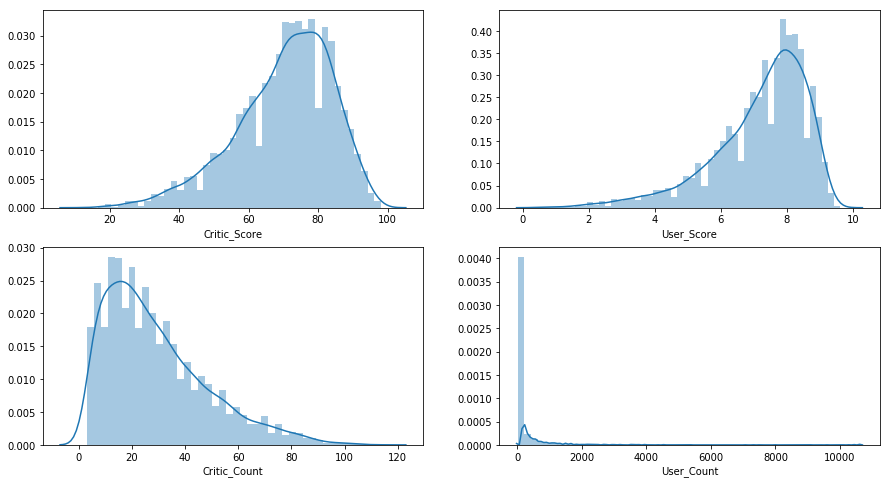

In [30]:
plt.figure(figsize=(15, 8))
plt.subplot(2,2,1)
sns.distplot(df2.Critic_Score)

plt.subplot(2,2,2)
sns.distplot(df2.User_Score)

plt.subplot(2,2,3)
sns.distplot(df2.Critic_Count)

plt.subplot(2,2,4)
sns.distplot(df2.User_Count)

## Developer

In [31]:
df2.Developer.unique()

array(['Nintendo', 'Good Science Studio', 'Rockstar North', ...,
       'Big Red Software', 'Fluid Studios', 'Atomic Games'], dtype=object)

In [32]:
len(df2.Developer.unique())

1289

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

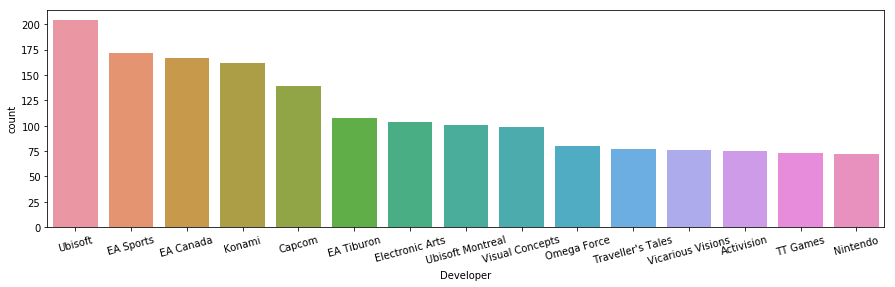

In [33]:
plt.figure(figsize=(15, 4))
sns.countplot(df.Developer, order=df.Developer.value_counts().iloc[:15].index)
plt.xticks(rotation=15)

In [34]:
sony_studio = df2.loc[(df2.Publisher.isna()==False) & (df2.Publisher.str.contains('Sony')), 'Developer'].value_counts()
print(sony_studio[np.arange(10)])

SCEA San Diego Studios    25
SCE Japan Studio          17
SCEA                      14
Namco                     12
989 Sports                12
SCEE London Studio        12
Naughty Dog               10
Zipper Interactive         8
SCEE                       7
Clap Hanz                  7
Name: Developer, dtype: int64


In [35]:
len(sony_studio)

124

## Rating

In [36]:
np.sort(df2.Rating.unique())

array(['AO', 'E', 'E10+', 'K-A', 'M', 'RP', 'T'], dtype=object)

In [37]:
rating = df2.Rating.value_counts()
print(rating)

T       2377
E       2082
M       1433
E10+     930
AO         1
K-A        1
RP         1
Name: Rating, dtype: int64


In [38]:
df2.loc[df2.Rating=='K-A', 'Rating'] = 'E' 

In [39]:
rating = df2.Rating.value_counts()
print(rating)

T       2377
E       2083
M       1433
E10+     930
AO         1
RP         1
Name: Rating, dtype: int64


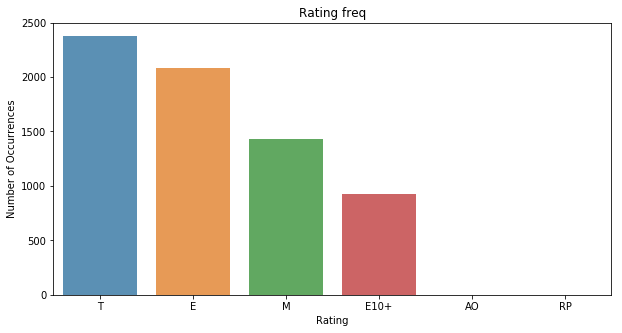

In [40]:
plt.figure(figsize=(10,5))
sns.barplot(rating.index, rating.values, alpha=0.8)
plt.title('Rating freq')
plt.ylabel('Number of Occurrences')
plt.xlabel('Rating')
plt.show()

## NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales

Game sales in North America (in millions of units)

In [41]:
((df.Global_Sales>=df.loc[:,['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)*0.99) 
& (df.Global_Sales<=df.loc[:,['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)*1.01)).head()

0    True
1    True
2    True
3    True
4    True
dtype: bool

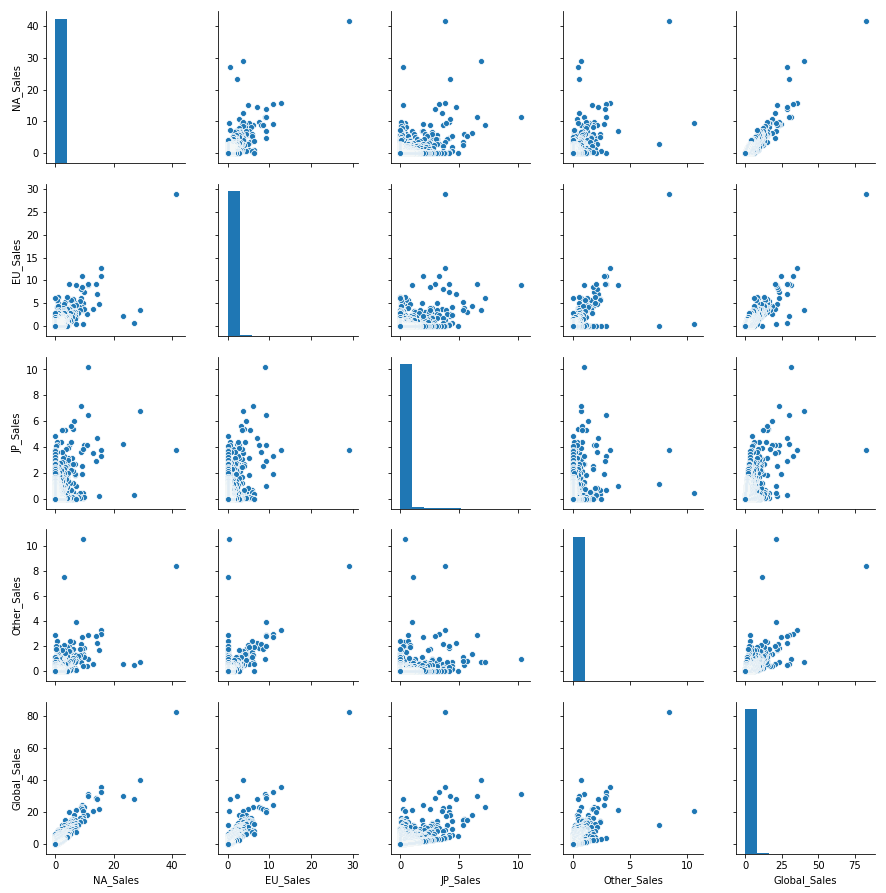

In [42]:
sns.pairplot(df.loc[:,['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']])

## Platform

This table counts the number of games released on each platform by year.

In [43]:
plat_freq = pd.crosstab(index=df2.Year_of_Release, columns=df2.Platform)
plat_freq

Platform,3DS,DC,DS,GBA,GC,PC,PS,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
Year_of_Release,,,,,,,,,,,,,,,,,
1985,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1988,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1992,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1994,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,2,5,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,1,12,0,0,0,0,0,0,0,0,0,0
1998,0,0,0,0,0,3,22,0,0,0,0,0,0,0,0,0,0
1999,0,3,0,0,0,2,25,0,0,0,0,0,0,0,0,0,0
2000,0,7,0,0,0,4,50,40,0,0,0,0,0,0,0,1,0


Continuous zeros in each column indicate that either the platform was not invented or was already dated. From this table we can see the evolution of platforms.

The following plot intuitively visualizes the data in the table. 

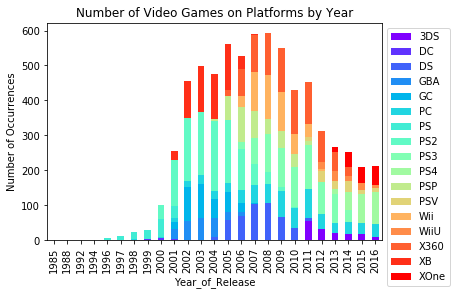

In [44]:
plat_freq.plot(kind='bar', stacked=True, colormap='rainbow')
plt.title('Number of Video Games on Platforms by Year')
plt.ylabel('Number of Occurrences')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

#### Market Share

This table aggregates the total global sales for each platform by year. 

In [45]:
plat_pivot = pd.pivot_table(df2, index='Year_of_Release', columns='Platform', values='Global_Sales', aggfunc=np.sum)
plat_pivot

Platform,3DS,DC,DS,GBA,GC,PC,PS,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
Year_of_Release,,,,,,,,,,,,,,,,,
1985,NaN,NaN,NaN,NaN,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,NaN,NaN,NaN,NaN,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992,NaN,NaN,NaN,NaN,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,NaN,NaN,NaN,NaN,NaN,NaN,1.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,NaN,NaN,NaN,2.62,17.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,NaN,NaN,NaN,4.12,30.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,NaN,NaN,NaN,0.10,43.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,2.04,NaN,NaN,NaN,0.11,49.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000,NaN,1.98,NaN,NaN,NaN,3.18,45.63,29.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.99,NaN


Continuous NaN's in each column indicate that either the platform was not invented or was already dated. From this table we can see the evolution of market share for platforms.

The following plot intuitively visualizes the data in the table. 

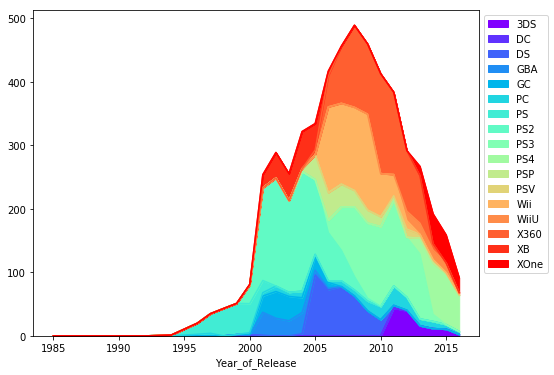

In [46]:
plat_pivot.plot(kind='area', stacked=True, colormap='rainbow', figsize=(8,6))
plt.legend(bbox_to_anchor=(1, 1))

This plot shows that the evolution in video game platform market is significant. New generations come out, occupy the market and are eventually replaced by next generations.

#### Most Selling Platform Each Year

In [47]:
plat_max = pd.DataFrame({'Platform':plat_pivot.idxmax(axis=1), 'Global_Sales':plat_pivot.max(axis=1)})
plat_max

,Platform,Global_Sales
Year_of_Release,,
1985,PC,0.03
1988,PC,0.03
1992,PC,0.03
1994,PS,1.27
1996,PS,17.48
1997,PS,30.89
1998,PS,43.08
1999,PS,49.02
2000,PS,45.63


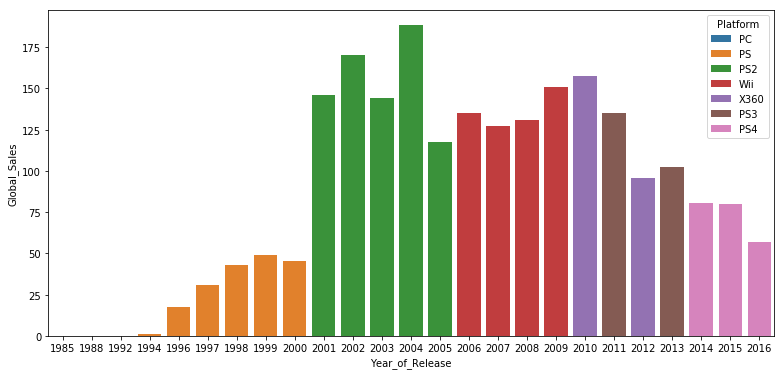

In [48]:
plat_max['Year_of_Release'] = plat_max.index
plt.figure(figsize=(13, 6))
sns.barplot(data=plat_max, x='Year_of_Release', y='Global_Sales', hue='Platform', dodge=False)
plt.show()

The plot above shows the most selling platforms each year.
Before 2000, Sony's PlayStation(PS) led in global sales. From 2001 to 2005, its new generation PS2 occupied the market. Nintendo Wii was leading for the next 4 year. Xbox 360 and PS3 from the 7th generation were the most competitive over 2010 to 2013. From 2014, PS4 from the 8th generation had the most sellings.

#### User Score Max

In [49]:
plat_score = pd.pivot_table(df2, index='Year_of_Release', columns='Platform', values='User_Score', aggfunc=np.mean)
plat_score_max = pd.DataFrame({'Platform':plat_score.idxmax(axis=1), 'User_Score':plat_score.max(axis=1)})
plat_score_max

,Platform,User_Score
Year_of_Release,,
1985,PC,5.800000
1988,PC,2.200000
1992,PC,8.200000
1994,PS,6.300000
1996,PC,8.600000
1997,PC,9.100000
1998,PC,9.100000
1999,PC,8.950000
2000,XB,8.500000


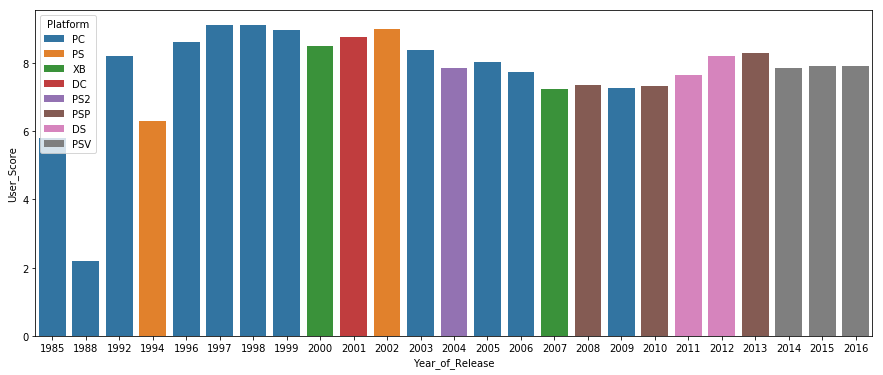

In [50]:
plat_score_max['Year_of_Release'] = plat_score_max.index
plt.figure(figsize=(15, 6))
sns.barplot(data=plat_score_max, x='Year_of_Release', y='User_Score', hue='Platform', dodge=False)
plt.show()

The plot above shows the platforms with highest average user scores on video games each year. PC used to be users' favorite platform before 2010. Nintendo DS(DS), PlayStation Portable(PSP) and PlayStation Vita(PSV) become popular recently.

### 8th GENERATION CONSOLE WAR: PS4 vs XBOXONE vs WiiU

Sony PS4, Xbox One and Nintendo WiiU are the representatives in the 8th Generation of video game consoles. The section aims to compare their performances. 

In [51]:
gen8 = df2[(df2.Platform == 'PS4') | (df2.Platform == 'XOne') | (df2.Platform == 'WiiU')]
gen8.shape

(487, 16)

In [52]:
gen8_freq = pd.crosstab(index=gen8.Year_of_Release, columns=gen8.Platform)
gen8_freq

Platform,PS4,WiiU,XOne
Year_of_Release,,,
2012,0,20,0
2013,15,27,14
2014,51,15,43
2015,81,19,47
2016,92,8,55


This table counts the number of games released on each platform in the 8th generation by year.

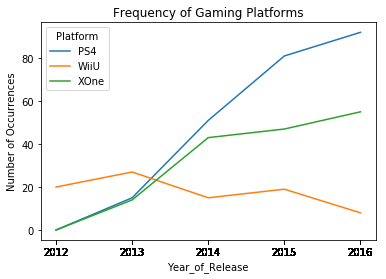

In [53]:
gen8_freq.plot()
plt.title('Frequency of Gaming Platforms')
plt.xticks(gen8.Year_of_Release)
plt.ylabel('Number of Occurrences')
plt.show()

The number of games increases for both PS4 and Xbox One. Nintendo WiiU was released 1 year early than the other two competitiors, but did not maintain a strong performance. 

In [54]:
gen8_pivot = pd.pivot_table(gen8, index='Year_of_Release', columns='Platform', values='Global_Sales', aggfunc=np.sum)
gen8_pivot

Platform,PS4,WiiU,XOne
Year_of_Release,,,
2012,NaN,14.85,NaN
2013,25.06,17.44,14.90
2014,80.73,15.21,47.07
2015,80.11,15.33,44.24
2016,57.13,3.25,23.36


Text(0,0.5,'Global_Sales')

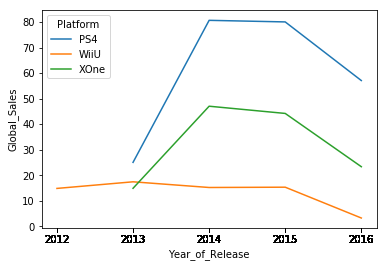

In [55]:
gen8_pivot.plot()
plt.xticks(gen8.Year_of_Release)
plt.ylabel('Global_Sales')

This plot shows the global sales of the three platforms. Compared with last plot, we notice that although the number of games increases, the total sales decreases in 2016. This is an indication of the end of the 8th generation.

In [87]:
gen8_genre = pd.pivot_table(gen8, index='Platform', columns='Genre', values='Global_Sales', aggfunc=np.sum)
gen8_genre

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
PS4,76.92,3.09,6.86,2.70,6.16,0.03,9.08,18.18,63.67,0.72,55.16,0.46
WiiU,13.61,0.08,1.22,10.93,21.33,1.30,7.09,1.26,5.56,0.20,2.39,1.11
XOne,29.07,1.57,2.25,4.08,0.62,NaN,8.84,8.21,48.12,0.01,26.59,0.21


<Figure size 1080x576 with 0 Axes>

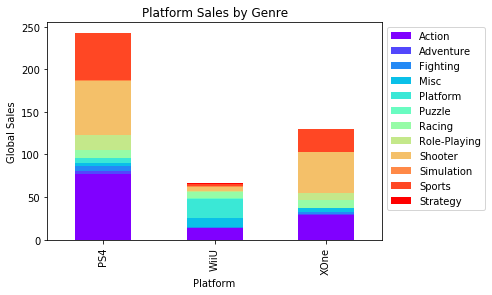

In [89]:
plt.figure(figsize=(15,8))
gen8_genre.plot(kind='bar', stacked=True, colormap='rainbow')
plt.title('Platform Sales by Genre')
plt.ylabel('Global Sales')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

The sales by genre is not proportional to their total sales. It seems that each platform has its own focuses. 

To better understand the focuses of each platform, we want to compare the ratio of sales to their total in the genre.

In [90]:
gen8_genre_percentage = gen8_genre.T/gen8_genre.sum(axis=1)
gen8_genre_percentage.T

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
PS4,0.316504,0.012714,0.028227,0.011110,0.025347,0.000123,0.037362,0.074806,0.261984,0.002963,0.226968,0.001893
WiiU,0.205962,0.001211,0.018462,0.165406,0.322791,0.019673,0.107294,0.019068,0.084140,0.003027,0.036168,0.016798
XOne,0.224357,0.012117,0.017365,0.031489,0.004785,NaN,0.068226,0.063363,0.371382,0.000077,0.205217,0.001621


<Figure size 1080x576 with 0 Axes>

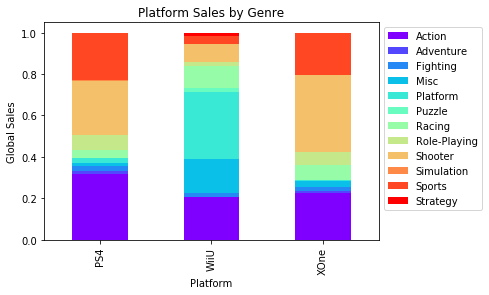

In [91]:
plt.figure(figsize=(15,8))
gen8_genre_percentage.T.plot(kind='bar', stacked=True, colormap='rainbow')
plt.title('Platform Sales by Genre')
plt.ylabel('Global Sales')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

From this plot, we can tell that Nintendo WiiU has top proportions in Misc, Platform, Puzzle and Strategy. Action, Adventure, Fighting, Role-playing, Shooting, Sports game developers usually choose PS4 and Xbox One as their platforms.

In [60]:
gen8_user = pd.pivot_table(gen8, index='Year_of_Release', columns='Platform', values='User_Count', aggfunc=np.sum)
gen8_user

Platform,PS4,WiiU,XOne
Year_of_Release,,,
2012,NaN,3053.0,NaN
2013,10291.0,6000.0,5849.0
2014,37715.0,5900.0,17447.0
2015,49941.0,5537.0,18189.0
2016,34320.0,1727.0,9123.0


Text(0,0.5,'Global_Sales')

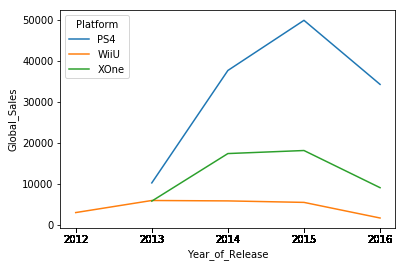

In [61]:
gen8_user.plot()
plt.xticks(gen8.Year_of_Release)
plt.ylabel('Global_Sales')

This is the global sales plot by year for the three platforms. Most of this plot follows the trend of number of games. One exception is when PS4 games gained more popularity in from 2014 to 2015. Its global sales increased by a large percentage, while the number of games didn't change too much.

In [92]:
gen8_rating = pd.pivot_table(gen8, index='Platform', columns='Rating', values='Global_Sales', aggfunc=np.sum)
gen8_rating

Rating,E,E10+,M,T
Platform,,,,
PS4,53.44,21.94,123.97,43.68
WiiU,34.37,23.30,3.96,4.45
XOne,26.94,12.88,73.26,16.49


<Figure size 1080x576 with 0 Axes>

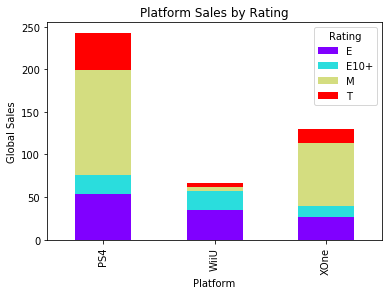

In [93]:
plt.figure(figsize=(15,8))
gen8_rating.plot(kind='bar', stacked=True, colormap='rainbow')
plt.title('Platform Sales by Rating')
plt.ylabel('Global Sales')
plt.show()

In [95]:
gen8_rating_percentage = gen8_rating.T/gen8_rating.sum(axis=1)
gen8_rating_percentage.T

Rating,E,E10+,M,T
Platform,,,,
PS4,0.219891,0.090277,0.510102,0.179731
WiiU,0.520127,0.352603,0.059927,0.067343
XOne,0.207918,0.099406,0.565409,0.127267


<Figure size 1080x576 with 0 Axes>

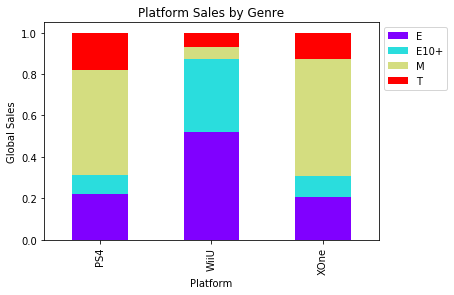

In [96]:
plt.figure(figsize=(15,8))
gen8_rating_percentage.T.plot(kind='bar', stacked=True, colormap='rainbow')
plt.title('Platform Sales by Genre')
plt.ylabel('Global Sales')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

Each platform has its preference on different age groups. WiiU provides a platform more for everyone, whereas PS4 and XOne prefer the mature group.

In [64]:
gen8_user_score = pd.pivot_table(gen8, index='Year_of_Release', columns='Platform', values='User_Score', aggfunc=np.mean)
gen8_user_score

Platform,PS4,WiiU,XOne
Year_of_Release,,,
2012,NaN,6.450000,NaN
2013,5.460000,7.192593,5.650000
2014,6.792157,7.260000,6.697674
2015,6.798765,7.163158,6.421277
2016,6.866304,7.312500,6.609091


<Figure size 432x288 with 0 Axes>

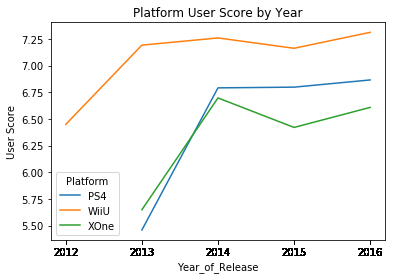

In [65]:
plt.figure()
gen8_user_score.plot()
plt.title('Platform User Score by Year')
plt.ylabel('User Score')
plt.xticks(gen8.Year_of_Release)
plt.show()

Although the sales of WiiU didn't beat PS4 or XOne, the games on WiiU remained the highest average user score over the entire generation. We also notice that the user score increases rapidly in the first year after release. Probably this increase is credited to the development on bug fixing and user experience in the first year, which heavely relies on users' feedback.

In [66]:
gen8_critic_score = pd.pivot_table(gen8, index='Year_of_Release', columns='Platform', values='Critic_Score', aggfunc=np.mean)
gen8_critic_score

Platform,PS4,WiiU,XOne
Year_of_Release,,,
2012,NaN,67.550000,NaN
2013,70.933333,72.370370,68.142857
2014,73.647059,70.733333,74.279070
2015,72.493827,70.842105,74.617021
2016,72.565217,72.250000,73.963636


<Figure size 1080x576 with 0 Axes>

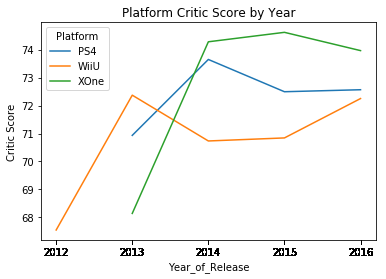

In [67]:
plt.figure(figsize=(15,8))
gen8_critic_score.plot()
plt.title('Platform Critic Score by Year')
plt.ylabel('Critic Score')
plt.xticks(gen8.Year_of_Release)
plt.show()

Similarly, the rapid increase exists for each platform in their first year. Different from the user score, the critics ranked XOne as the best and WiiU as the worst.

### Generations of PlayStation: PS2 vs PS3 vs PS4

We also want to know how the generations of video game consoles in the same brand compare with each other. We choose PS2 vs PS3 vs PS4 as an example. They are all successors of each other in Sony's PlayStation series, from 6th, 7th and 8th generation in the history of consoles respectively.

In [68]:
ps = df2[(df2.Platform == 'PS2') | (df2.Platform == 'PS3') | (df2.Platform == 'PS4')]
ps.shape

(2148, 16)

In [69]:
ps_freq = pd.crosstab(index=ps.Year_of_Release, columns=ps.Platform)
ps_freq

Platform,PS2,PS3,PS4
Year_of_Release,,,
2000,40,0,0
2001,132,0,0
2002,181,0,0
2003,180,0,0
2004,201,0,0
2005,181,0,0
2006,117,19,0
2007,61,76,0
2008,34,109,0


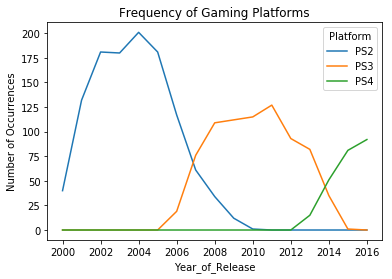

In [70]:
ps_freq.plot()
plt.title('Frequency of Gaming Platforms')
plt.ylabel('Number of Occurrences')
plt.show()

Each platform in the series has its own activate time on stage, which is the generation they belong to.

PS2(5th generation): 2000-2007  
PS3(6th generation): 2006-2014  
PS4(7th generation): 2013-

In [71]:
ps_pivot = pd.pivot_table(ps, index='Year_of_Release', columns='Platform', values='Global_Sales', aggfunc=np.sum)
ps_pivot

Platform,PS2,PS3,PS4
Year_of_Release,,,
2000,29.46,NaN,NaN
2001,145.93,NaN,NaN
2002,170.03,NaN,NaN
2003,144.32,NaN,NaN
2004,188.31,NaN,NaN
2005,117.68,NaN,NaN
2006,75.96,19.61,NaN
2007,48.09,68.49,NaN
2008,21.14,109.80,NaN


Text(0,0.5,'Global_Sales')

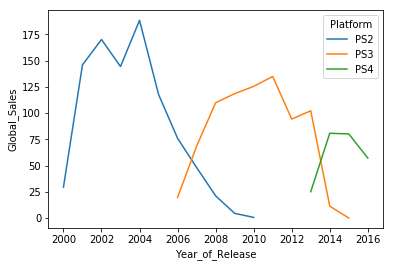

In [72]:
ps_pivot.plot()
plt.ylabel('Global_Sales')

The sales graph is similar to the number of games, also showing the generation's range over time.

In [73]:
ps_genre = pd.pivot_table(ps, index='Platform', columns='Genre', values='Global_Sales', aggfunc=np.sum)
ps_genre

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
PS2,238.73,10.74,64.72,38.70,52.34,3.97,127.17,77.30,98.20,34.01,191.88,8.21
PS3,262.38,16.18,47.83,26.59,20.91,0.40,62.17,64.00,174.54,7.91,98.20,3.19
PS4,76.92,3.09,6.86,2.70,6.16,0.03,9.08,18.18,63.67,0.72,55.16,0.46


<Figure size 1080x576 with 0 Axes>

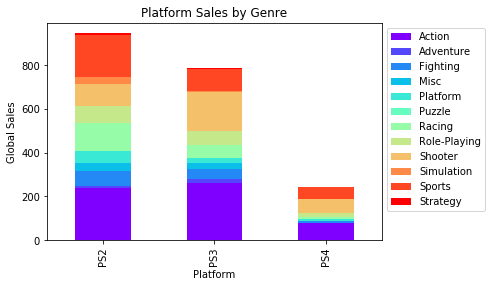

In [74]:
plt.figure(figsize=(15,8))
ps_genre.plot(kind='bar', stacked=True, colormap='rainbow')
plt.title('Platform Sales by Genre')
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('Global Sales')
plt.show()

Each platform has its preference in genres. We will use ratio of each genre's share over the total global sale of the platform to compare their preferences.

In [75]:
ps_genre_percentage = ps_genre.T/ps_genre.sum(axis=1)
ps_genre_percentage.T

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
PS2,0.252365,0.011353,0.068417,0.040910,0.055329,0.004197,0.134433,0.081715,0.103809,0.035953,0.202839,0.008679
PS3,0.334540,0.020630,0.060984,0.033903,0.026661,0.000510,0.079268,0.081601,0.222542,0.010085,0.125207,0.004067
PS4,0.316504,0.012714,0.028227,0.011110,0.025347,0.000123,0.037362,0.074806,0.261984,0.002963,0.226968,0.001893


<Figure size 1080x576 with 0 Axes>

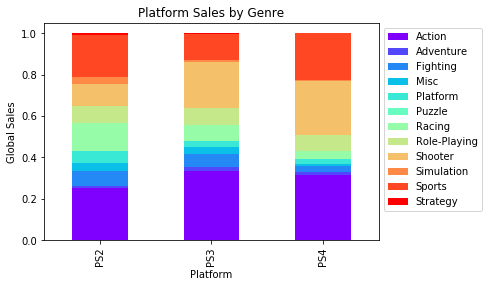

In [76]:
plt.figure(figsize=(15,8))
ps_genre_percentage.T.plot(kind='bar', stacked=True, colormap='rainbow')
plt.title('Platform Sales by Genre')
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('Global Sales')
plt.show()

As generations evolve, Shooter and Action games gradually increase their proportions, whereas Fighting, Puzzle, Racing, Simulation's proportions decrease. This trend reflects the change in players' taste in terms of genre.

In [77]:
ps_user = pd.pivot_table(ps, index='Year_of_Release', columns='Platform', values='User_Count', aggfunc=np.sum)
ps_user

Platform,PS2,PS3,PS4
Year_of_Release,,,
2000,868.0,NaN,NaN
2001,8089.0,NaN,NaN
2002,6333.0,NaN,NaN
2003,7509.0,NaN,NaN
2004,9287.0,NaN,NaN
2005,11083.0,NaN,NaN
2006,5452.0,1601.0,NaN
2007,2334.0,8259.0,NaN
2008,1343.0,23846.0,NaN


Text(0,0.5,'Global_Sales')

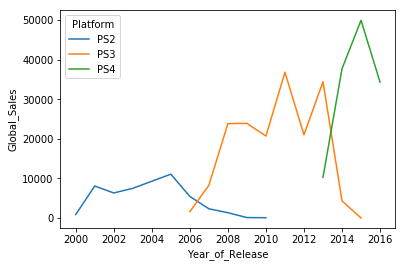

In [78]:
ps_user.plot()
plt.ylabel('Global_Sales')

The user count plot also follows the timeline of generation, platform from each generation peaks at a different time. However, we notice that there are dramatic increases in the user number over generations.

In [79]:
ps_rating = pd.pivot_table(ps, index='Platform', columns='Rating', values='Global_Sales', aggfunc=np.sum)
ps_rating

Rating,E,E10+,M,T
Platform,,,,
PS2,339.33,43.51,203.89,359.24
PS3,150.94,61.67,360.15,211.54
PS4,53.44,21.94,123.97,43.68


<Figure size 1080x576 with 0 Axes>

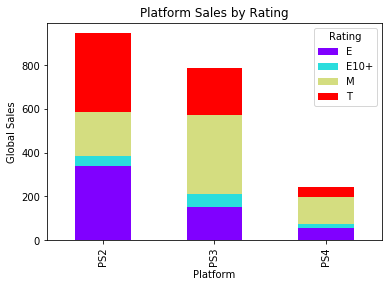

In [80]:
plt.figure(figsize=(15,8))
ps_rating.plot(kind='bar', stacked=True, colormap='rainbow')
plt.title('Platform Sales by Rating')
plt.ylabel('Global Sales')
plt.show()

Each platform has its preference in Rating group. We will use ratio of each genre's share over the total global sale of the platform to compare their preferences.

In [81]:
ps_rating_percentage = ps_rating.T/ps_rating.sum(axis=1)
ps_rating_percentage.T

Rating,E,E10+,M,T
Platform,,,,
PS2,0.358711,0.045995,0.215535,0.379758
PS3,0.192452,0.078631,0.459199,0.269718
PS4,0.219891,0.090277,0.510102,0.179731


<Figure size 1080x576 with 0 Axes>

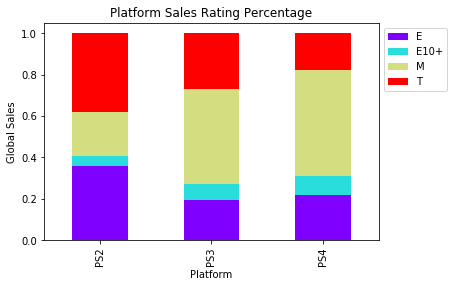

In [82]:
plt.figure(figsize=(15,8))
ps_rating_percentage.T.plot(kind='bar', stacked=True, colormap='rainbow')
plt.title('Platform Sales Rating Percentage')
plt.ylabel('Global Sales')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

It seems that Playstation has been shifting its targeting user group from teenagers to the mature.

In [83]:
ps_user_score = pd.pivot_table(ps, index='Year_of_Release', columns='Platform', values='User_Score', aggfunc=np.mean)
ps_user_score

Platform,PS2,PS3,PS4
Year_of_Release,,,
2000,7.562500,NaN,NaN
2001,7.410606,NaN,NaN
2002,7.612707,NaN,NaN
2003,7.961667,NaN,NaN
2004,7.835821,NaN,NaN
2005,7.828177,NaN,NaN
2006,7.639316,6.710526,NaN
2007,7.175410,6.840789,NaN
2008,7.223529,6.788073,NaN


<Figure size 432x288 with 0 Axes>

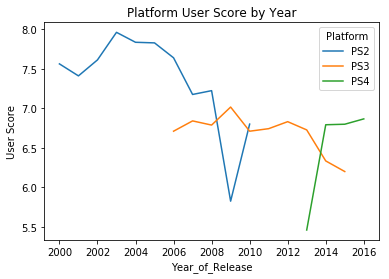

In [84]:
plt.figure()
ps_user_score.plot()
plt.title('Platform User Score by Year')
plt.ylabel('User Score')
plt.show()

The average user scores for games has been decreases over years. Users are less satisfied with games on newer generations of platforms.

In [85]:
ps_critic_score = pd.pivot_table(ps, index='Year_of_Release', columns='Platform', values='Critic_Score', aggfunc=np.mean)
ps_critic_score

Platform,PS2,PS3,PS4
Year_of_Release,,,
2000,71.875000,NaN,NaN
2001,71.083333,NaN,NaN
2002,70.060773,NaN,NaN
2003,70.788889,NaN,NaN
2004,69.194030,NaN,NaN
2005,69.779006,NaN,NaN
2006,67.811966,69.789474,NaN
2007,65.983607,72.736842,NaN
2008,64.441176,69.155963,NaN


<Figure size 432x288 with 0 Axes>

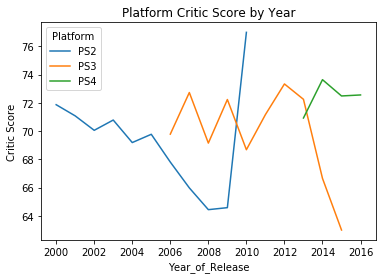

In [86]:
plt.figure()
ps_critic_score.plot()
plt.title('Platform Critic Score by Year')
plt.ylabel('Critic Score')
plt.show()

The critics, on the other hand, has become more satisfied with games on newer generations of platforms.